### Declaramos las variables necesarias 

In [30]:
h = 0.1 # Declaramos el espaciamiento.
a = 0 
b = 1
N = (b-a)/h
print(f"El intervalo es dividido en {N} partes iguales.")

El intervalo es dividido en 10.0 partes iguales.


In [31]:
Rh = [] # Se declara un array para almacenar los puntos de discretización.
N = int(N) # El intervalo se convierte a un número enter.
for i in range(N+1):
    if (i==0): # No se almacena el cero en el arry Rh.
        continue # Así que realiza un salto y continua con la siguiente iteración.
    xi = a + i * h # el xi es cada punto de discretización que se almacenará en Rh.
    Rh.append(xi) # agregamos el punto xi al array Rh.
print(Rh) # Se imprimen los valores que tiene el array Rh.

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


### Desarrollamos el Método de Euler Explícito
El **método explícito** es el siguiente $y_{i+1}=y_i+h(-y_i+x_i)$
Se tiene como dato que $y_0=\alpha$ entonces $y_0=1$

In [32]:
y_aprox = [] # Se declara un array para almacenar las aproximaciones.
for i in range(N):
    if(i==0): # Condicional, si i=0 entonces
        y_i = 1 + h * (-1 + a) # realiza la siguiente función y el resultado
        y_aprox.append(y_i) # Se almacena en el array y_aprox.
    else:
        y_i = y_aprox[i-1] + h * (-y_aprox[i-1] + Rh[i-1])
        y_aprox.append(y_i)
print(y_aprox)

[0.9, 0.8200000000000001, 0.758, 0.7122, 0.68098, 0.662882, 0.6565938, 0.66093442, 0.674840978, 0.6973568802]


### Calculamos la solución exacta, para ello definimos la función.

In [33]:
import math

def funcion(x):
    return x - 1 + 2 * math.exp(-x)

sol_exacta = [] # Se declara un array para almacenar las soluciones exactas.

for i in Rh: # Se declara el Rh ya que contiene los puntos de discretización.
    sol = funcion(i)
    sol_exacta.append(sol)
print(sol_exacta)

[0.909674836071919, 0.8374615061559636, 0.7816364413634358, 0.7406400920712787, 0.7130613194252668, 0.6976232721880529, 0.693170607582819, 0.6986579282344432, 0.7131393194811982, 0.7357588823428847]


### Graficamos las soluciones

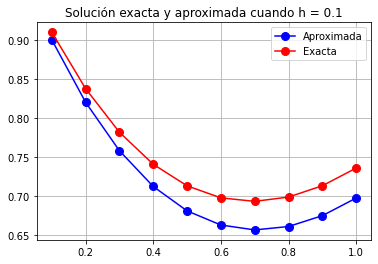

In [34]:
import matplotlib.pyplot as plt

plt.plot(Rh, y_aprox, "bo-", markersize=8, label="Aproximada")
plt.plot(Rh, sol_exacta, "ro-", markersize=8, label="Exacta")
plt.title("Solución exacta y aproximada cuando h = 0.1")
plt.legend(loc="upper right")
plt.savefig("imagen_h_0_1.pdf")
#plt.savefig("imagen_h_0_2.pdf")
plt.grid()
plt.show()

### Calculamos el error absoluto

In [35]:
E_abs = []

for i in range(N):
    s = abs(sol_exacta[i]-y_aprox[i])
    E_abs.append(s)
    
print(E_abs)

[0.00967483607191899, 0.017461506155963535, 0.02363644136343579, 0.028440092071278622, 0.03208131942526682, 0.034741272188052896, 0.036576807582819004, 0.03772350823444315, 0.03829834148119826, 0.038402002142884695]


### Creamos un dataFrame para luego crear una tabla con los resultados obtenidos

In [36]:
import pandas as pd
from tabulate import tabulate

datos = {
    'Rh' : Rh,
    'S. Aprox' : y_aprox,
    'S. Exact' : sol_exacta,
    'Error Abs' : E_abs
}

#df = pd.DataFrame(datos)
#print(df)
print(tabulate(datos, headers=["Rh", "Sol. Aprox", "Sol. Exacta","Error Abs"], tablefmt='fancy_grid',stralign='center'))

╒══════╤══════════════╤═══════════════╤═════════════╕
│   Rh │   Sol. Aprox │   Sol. Exacta │   Error Abs │
╞══════╪══════════════╪═══════════════╪═════════════╡
│  0.1 │     0.9      │      0.909675 │  0.00967484 │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.2 │     0.82     │      0.837462 │  0.0174615  │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.3 │     0.758    │      0.781636 │  0.0236364  │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.4 │     0.7122   │      0.74064  │  0.0284401  │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.5 │     0.68098  │      0.713061 │  0.0320813  │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.6 │     0.662882 │      0.697623 │  0.0347413  │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.7 │     0.656594 │      0.693171 │  0.0365768  │
├──────┼──────────────┼───────────────┼─────────────┤
│  0.8 │     0.660934 │      0.698658 │  0.0377235  │
├──────┼──────────────┼─────